In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from tensorly.base import unfold

np.random.seed(14159)

In [2]:
# Set parameters
n = np.array([600, 400, 200])
beta_M = 3
rho = 4

In [3]:
# Define variables

n_T = n[0]+n[1]+n[2]
n_M = n[0]+n[1]
c = n/n_T

beta_T = np.sqrt(np.sqrt(n[0]*n[1]*n[2])*rho/(n_T*(n[0]*n[1]/n_M+beta_M**2)))

setting = "$\\mathbf{{n}} = {{{}}}^\\top \\quad \\varrho = {{{}}} \\quad \\beta_M = {{{}}}$".format(list(n), rho, beta_M)

# Set model
x, y, z = (np.random.randn(n[ell]) for ell in range(3))
x /= linalg.norm(x)
y /= linalg.norm(y)
z /= linalg.norm(z)

Z = np.random.randn(n[0], n[1])
W = np.random.randn(*n)

M = beta_M*np.einsum('i,j->ij', x, y)+Z/np.sqrt(n_M)
T = beta_T*np.einsum('ij,k->ijk', M, z)+W/np.sqrt(n_T)

In [4]:
T3 = unfold(T, 2)
eigvals, eigvecs = linalg.eigh(T3@T3.T)

mu = (n[2]+n[0]*n[1])/n_T
sigma = np.sqrt(n[0]*n[1]*n[2])/n_T

SC = lambda x: np.sqrt(np.maximum(4-x**2, 0))/(2*np.pi)

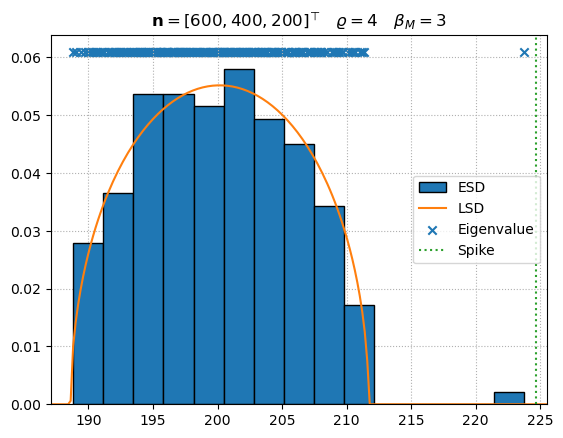

In [5]:
plt.hist(eigvals, bins='sqrt', edgecolor='black', density=True, color='C0', zorder=2, label="ESD")
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, SC((xx-mu)/sigma)/sigma, color='C1', label="LSD")
_, ymax = plt.ylim()
plt.scatter(eigvals, [ymax]*n[2], marker='x', label="Eigenvalue")
plt.axvline((rho+1/rho)*sigma+mu, ls=':', color='C2', label="Spike")
plt.grid(ls=':')
plt.xlim(xmin, xmax)
plt.title(setting)
plt.legend()
plt.show()